In [31]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np 
import collections
import matplotlib.pyplot as plt 

In [32]:
#Import wine dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url)
df.head(5)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [33]:
#Add column names
df.columns =['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
             'Hue',	'OD280/OD315 of diluted wines',	'Proline']
df.tail(5)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [34]:
#Split the dataset

X = df.drop(['class'],axis=1).values
y =df['class'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)
size = len(df.index)
print(size)

177


Constructing a kNN Algorithm

In [35]:
#This section focuses on the creation of a kNN function that will be applied to answer the questions.

# Two distance metrics will be used to calculate the distance between the data points. 
# Each metric is assigned a function that will be called by the kNN function as required.

# L2 metric
def Euclidean_Distance(x, y):
    return np.sqrt(np.sum(np.square(x - y)))

# Minkowski metric
def Minkowski_Distance(x, y, p):
    return (abs(x[0]-y[0])**p+abs(x[1]-y[1])**p+abs(x[2]-y[2])**p)**(1/p)


# The function takes in the metric distances and preserves their indices. The function identifes 
# the first k elements in the sorted array and implments majority voting to identify the class with
# the highest number of occurrences. That class is assigned to the data point for classification.

def predict_output(distances, outputs, K, weight, metric):
    if weight == 'uniform':
        nearest_k = [outputs[x[1]] for x in distances[:K]]
        tally = collections.Counter(nearest_k)
        return tally.most_common()[0][0], tally.most_common()[0][1] / K
    if weight == 'weighted':
        tot_output = {}
        max_tot_output = -1
        count = 0
        for distance, idx in distances:
            if distance == 0: continue
            if count == K: break
            count += 1
            tot_output[outputs[idx]] = tot_output.get(outputs[idx], 0) + (1 / distance)
            if tot_output[outputs[idx]] > max_tot_output:
                max_tot_output = tot_output[outputs[idx]]
                predicted_output = outputs[idx]
        return predicted_output, max_tot_output / sum(tot_output.values())
    

# This is the prediction function that takes in the number of training and test cases as well as the 
# number of features. The function allows for the preferential calculation of distance metrics and 
# the values are stored in an array and sorted in ascending order before being passed for majority voting. 

def predict(train_X, outputs, test, K, weight, metric, p):
    distances = []
    for i, sample in enumerate(train_X):
        if metric == 'euclidean':
            distance = Euclidean_Distance(sample, test)
        elif metric == 'minkowski':
            distance = Minkowski_Distance(sample, test, p)
        distances.append((distance, i))

    distances.sort()

    return predict_output(distances, outputs, K, weight, metric)


# The kNN Classifier function returns a classifcation matrix showing the likelihood that a predicted value (label)
# belongs to a specific class.  The predicted label for k-nearest neighbor is associated with the actual expected classification (cost)
# as well as the posterior probabilities, all of which are stored in a dataframe.

def kNN_Classification(X_train, y_train, X_test, y_test, K, weight, metric, p):
    predicted = []
    for i, test in enumerate(X_test):
        label, score = predict(X_train, y_train, test, K, weight, metric, p)
        cost = y_test[i]
        predicted.append((cost, label, score))
    
    prediction = pd.DataFrame.from_records(predicted, columns=["Cost", "Label", "Score"])
    
    return prediction


# Finally we create a function to measure the accuracy of the kNN classifer. The function can also be 
# used to calculate the error rate since it takes into account the total number of data points.

# Calculate Accuracy
def Accuracy(class_matrix):
    return class_matrix[class_matrix["Cost"] == class_matrix["Label"]].shape[0] / class_matrix.shape[0]



# Minkowski

Text(0, 0.5, 'Error Rate')

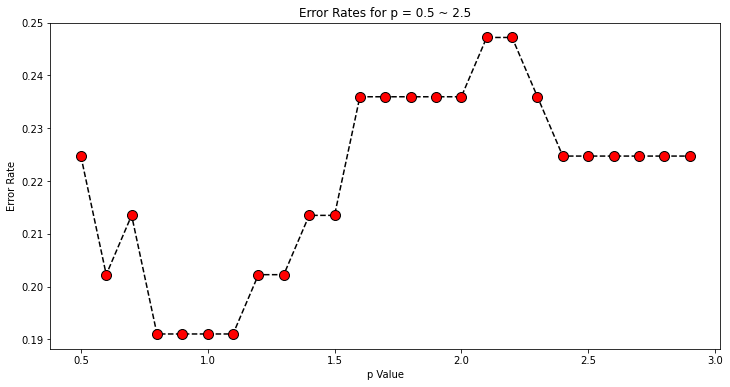

In [36]:
error = []

for i in np.arange(0.5,3,0.1):  
   accuracy = Accuracy(kNN_Classification(x_train, y_train, x_test, y_test, K = 5, weight='uniform', metric = 'minkowski', p = i))
   error.append(1 - accuracy)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0.5, 3, 0.1), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rates for p = 0.5 ~ 2.5')
plt.xlabel('p Value')
plt.ylabel('Error Rate')

The optimal p value of Minkowski Lp is 0.8.

# Euclidean

Text(0, 0.5, 'Error Rate')

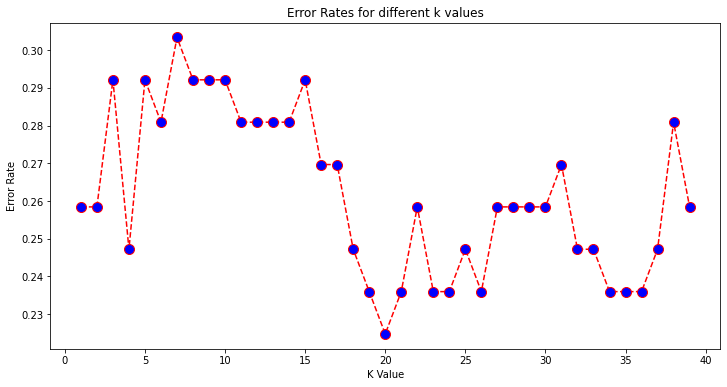

In [37]:
error = []
for i in range(1, 40):
    accuracy = Accuracy(kNN_Classification(x_train, y_train, x_test, y_test, K = i, weight='uniform', metric = 'euclidean', p = 0))
    error.append(1 - accuracy)
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rates for different k values')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

The optimal k of the kNN classifier using L2 is 20.

# Weighted Euclidean

Text(0, 0.5, 'Error Rate')

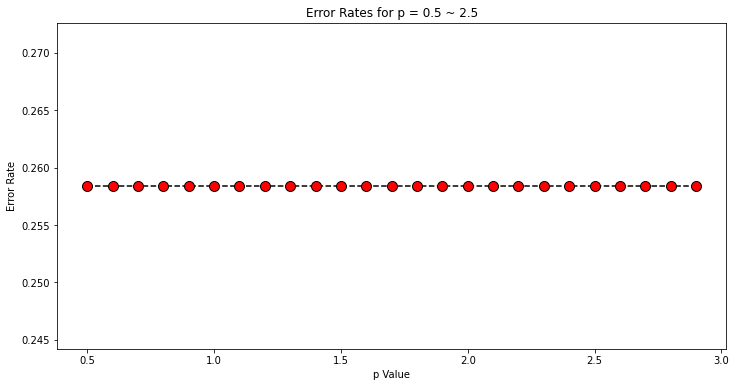

In [38]:
error = []

for i in np.arange(0.5,3,0.1):    
    accuracy = Accuracy(kNN_Classification(x_train, y_train, x_test, y_test, K = 5, weight='weighted', metric = 'euclidean', p = i))
    error.append(1 - accuracy)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0.5, 3, 0.1), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rates for p = 0.5 ~ 2.5')
plt.xlabel('p Value')
plt.ylabel('Error Rate')

The optimal p value for the distance wi weighted (k = 5)-NN classifier is 0.5.

Data Normalization

In [39]:
# Copy the data
df_normalized = df.copy()
  
# Apply min-max normalization
for column in df_normalized.columns:
    df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())    
  
# view normalized data
df_normalized.head()



,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
1,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
2,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
3,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
4,0.0,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949


In [40]:
#Split the normalized dataset

X_norm = df_normalized.drop(['class'],axis=1).values
y_norm =df_normalized['class'].values

x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size = 0.5, random_state=0)

# Minkowski

Text(0, 0.5, 'Error Rate')

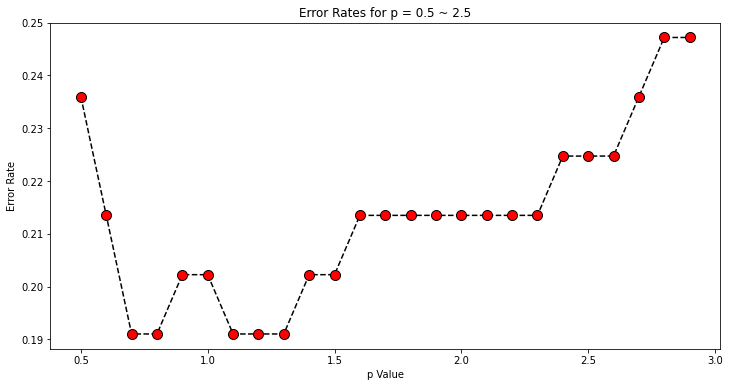

In [41]:
error = []

for i in np.arange(0.5,3,0.1):  
   accuracy = Accuracy(kNN_Classification(x_train_norm, y_train_norm, x_test_norm, y_test_norm, K = 5, weight='uniform', metric = 'minkowski', p = i))
   error.append(1 - accuracy)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0.5, 3, 0.1), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rates for p = 0.5 ~ 2.5')
plt.xlabel('p Value')
plt.ylabel('Error Rate')

The p value that gives the least error rate of the nearest neighbor classifier when Minkowski Lp is used 0.7

# Euclidean

Text(0, 0.5, 'Error Rate')

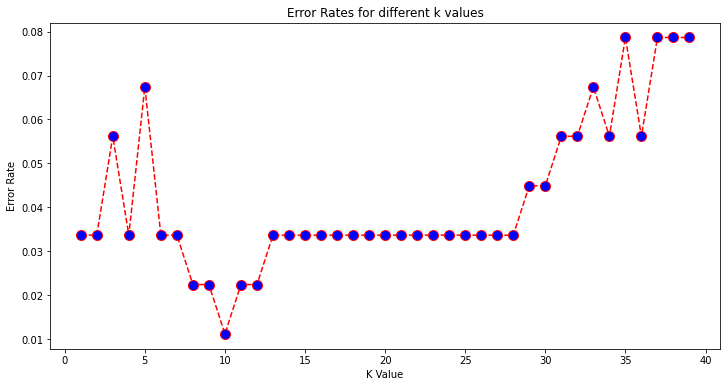

In [42]:
error = []
for i in range(1, 40):
    accuracy = Accuracy(kNN_Classification(x_train_norm, y_train_norm, x_test_norm, y_test_norm, K = i, weight='uniform', metric = 'euclidean', p = 0))
    error.append(1 - accuracy)
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rates for different k values')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

The optimal k of the kNN classifier using L2 is 10.

# Weighted Euclidean

Text(0, 0.5, 'Error Rate')

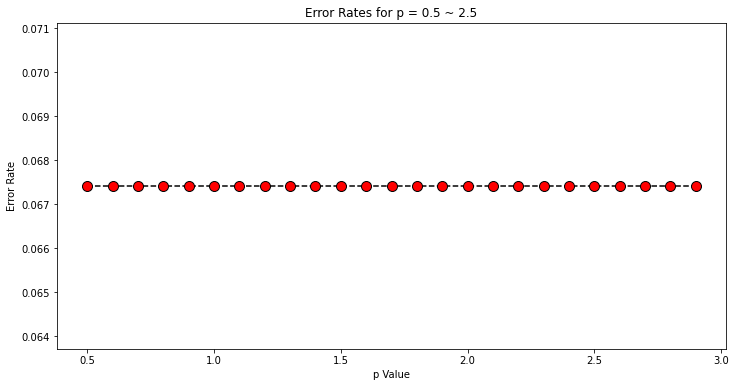

In [43]:
error = []

for i in np.arange(0.5,3,0.1):    
    accuracy = Accuracy(kNN_Classification(x_train_norm, y_train_norm, x_test_norm, y_test_norm, K = 5, weight='weighted', metric = 'euclidean', p = i))
    error.append(1 - accuracy)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0.5, 3, 0.1), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rates for p = 0.5 ~ 2.5')
plt.xlabel('p Value')
plt.ylabel('Error Rate')

The optimal p value for the distance wi weighted (k = 5)-NN classifier i 0.5